## Problem statement
## Prepare a classification model using SVM for salary data 

In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data sets
df_test = pd.read_csv("D:\\ExcelR\\Assignments\\Downloaded\\SVM\\SalaryData_Test(1).csv")
df_train = pd.read_csv("D:\\ExcelR\\Assignments\\Downloaded\\SVM\\SalaryData_Train(1).csv")

In [3]:
df_test.isnull().mean()

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

In [4]:
df_train.isnull().mean()

age              0.0
workclass        0.0
education        0.0
educationno      0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native           0.0
Salary           0.0
dtype: float64

-No null values from the data

In [5]:
#duplicate values of test set
df_test[df_test.duplicated()].shape

(930, 14)

In [6]:
df_test.drop_duplicates().shape

(14130, 14)

In [7]:
#duplicate values of train set
df_train[df_train.duplicated()].shape

(3258, 14)

In [8]:
df_train.drop_duplicates().shape

(26903, 14)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
#correaltion matrix for test
df_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


In [14]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
#correaltion matrix for train
df_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [16]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# EXPLORATION OF DATA USING VISUALIZATION

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

<AxesSubplot:>

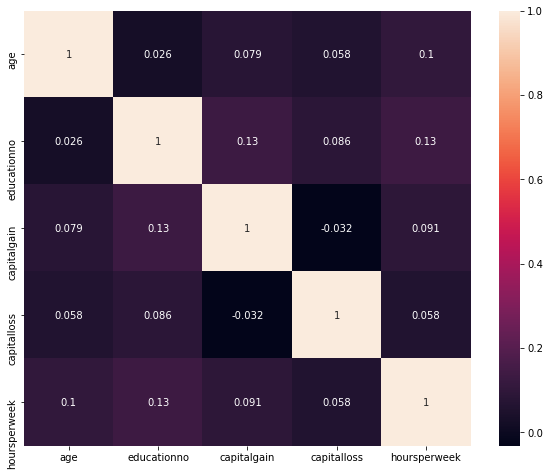

In [18]:
plt.figure(figsize=(10,8)) #heat map of correlation matrix for test data set
sns.heatmap(df_test.corr(), annot=True)

<AxesSubplot:>

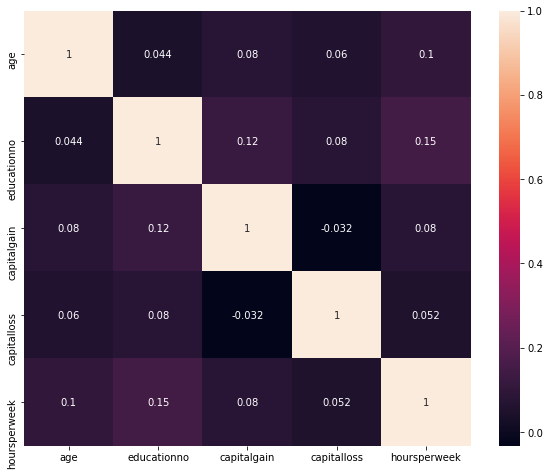

In [19]:
plt.figure(figsize=(10,8)) #heat map of correlation matrix for train data set
sns.heatmap(df_train.corr(), annot=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

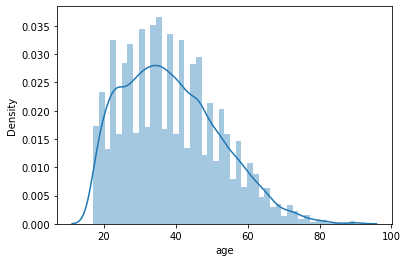

In [20]:
sns.distplot(df_test['age'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

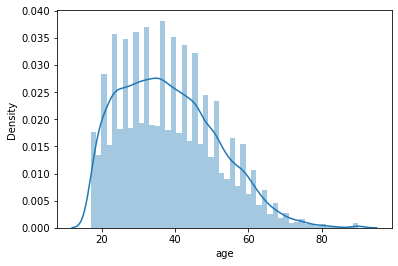

In [21]:
sns.distplot(df_train['age'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

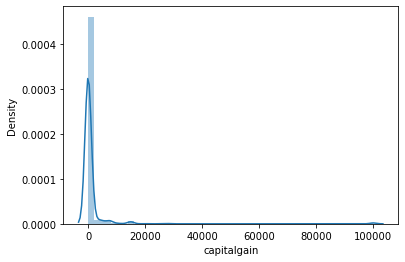

In [22]:
sns.distplot(df_test['capitalgain'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

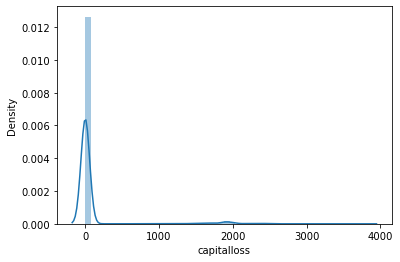

In [23]:
sns.distplot(df_test['capitalloss'])

In [24]:
df_test['Salary'] = df_test['Salary'].map({' <=50K':1,' >50K':0})
df_train['Salary'] = df_train['Salary'].map({' <=50K':1,' >50K':0})
df_test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,0
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,1
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,1
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,0
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,1


In [25]:
X = df_train.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y = df_train['Salary']
print(np.unique(Y))
X.head()

[0 1]


,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,1
1,50,13,0,0,13,1
2,38,9,0,0,40,1
3,53,7,0,0,40,1
4,28,13,0,0,40,1


# Feature Selection and Encoding

In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [27]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,1
1,33,4,9,12,2,3,0,4,1,0,0,12,37,1
2,21,2,11,8,0,5,1,4,1,0,0,39,37,1
3,36,2,1,6,2,5,0,2,1,0,0,39,37,1
4,11,2,9,12,2,9,5,2,0,0,0,39,4,1


In [28]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,1
1,21,2,11,8,2,4,0,4,1,0,0,49,37,1
2,11,1,7,11,2,10,0,4,1,0,0,39,37,0
3,27,2,15,9,2,6,0,2,1,87,0,39,37,0
4,17,2,0,5,4,7,1,4,1,0,0,29,37,1


In [29]:
x = df_train.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
y = df_train['Salary']
x.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,24,0,39,1
1,33,12,0,0,12,1
2,21,8,0,0,39,1
3,36,6,0,0,39,1
4,11,12,0,0,39,1


In [30]:
X = df_test.drop(['workclass','education','relationship','occupation','native','maritalstatus','sex','race'],axis=1)
Y = df_test['Salary']
X.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,0,0,39,1
1,21,8,0,0,49,1
2,11,11,0,0,39,0
3,27,9,87,0,39,0
4,17,5,0,0,29,1


In [31]:
#splitdata train test 80/20

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

##### Linear Support Vector Machine

In [33]:
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9326029216467463


##### Radical Support Vector Machine

In [34]:
from sklearn import svm #support vector Machine
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.9326029216467463


##### support vector Machine

In [35]:
from sklearn import svm 
svc_radical =svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical)

The accuracy of sigmoid SVC Model is 0.7556440903054449


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
from sklearn.svm import SVC
svc = SVC(gamma=0.33)
svc.fit(X_train, Y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9306108897742363


##### support vector Machine

In [38]:
from sklearn import svm 
svc_radical =svm.SVC(kernel='poly',C=1,gamma=0.33)
svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical)

The accuracy of poly SVC Model is 0.998339973439575


##### Conclusion: as we can see kernal poly has high accuracy compared to others